In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
import xgboost as xgb

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
from sklearn import preprocessing


In [14]:
df=pd.read_csv("adult.csv")


In [15]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [16]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

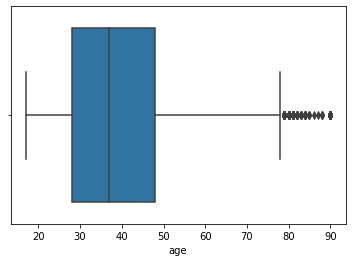

In [21]:
sns.boxplot(df['age'])

In [22]:
q1=df['age'].quantile(0.25)

In [23]:
q3=df['age'].quantile(0.75)

In [24]:
IQR=q3-q1

In [25]:
lower=q1-1.5*IQR

In [26]:
upper=q3+1.5*IQR

In [27]:
df=df[(df['age']>lower) & (df['age']<upper)]

In [28]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours.per.week'>

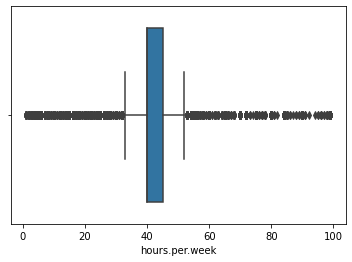

In [29]:
sns.boxplot(df['hours.per.week'])

In [30]:
q1=df['hours.per.week'].quantile(0.25)

In [31]:
q3=df['hours.per.week'].quantile(0.75)

In [32]:
IQR=q3-q1

In [33]:
lower=q1-1.5*IQR

In [34]:
upper=q3+1.5*IQR

In [35]:
df=df[(df['hours.per.week']>lower) & (df['hours.per.week']<upper)]

In [36]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours.per.week'>

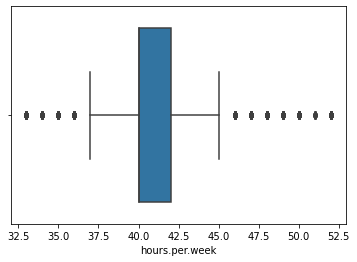

In [37]:
sns.boxplot(df['hours.per.week'])

In [38]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education.num'>

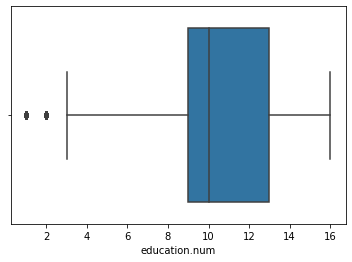

In [39]:
sns.boxplot(df['education.num'])

In [40]:
q1=df['education.num'].quantile(0.25)

In [41]:
q3=df['education.num'].quantile(0.75)

In [42]:
IQR=q3-q1

In [43]:
lower=q1-1.5*IQR

In [44]:
upper=q3+1.5*IQR

In [45]:
df=df[(df['education.num']>lower) & (df['education.num']<upper)]

In [46]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education.num'>

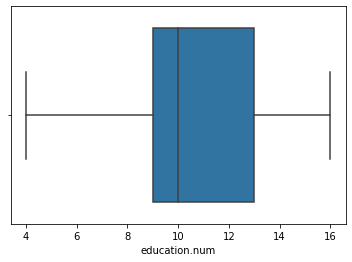

In [47]:
sns.boxplot(df['education.num'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital.loss'>

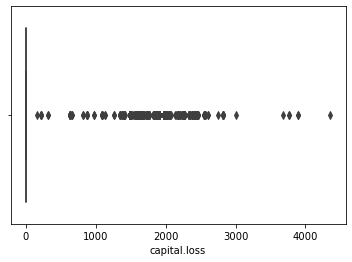

In [48]:
sns.boxplot(df['capital.loss'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

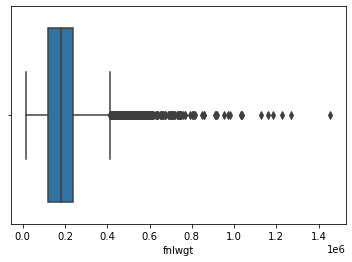

In [49]:
sns.boxplot(df['fnlwgt'])

In [50]:
q1=df['fnlwgt'].quantile(0.25)

In [51]:
q3=df['fnlwgt'].quantile(0.75)

In [52]:
IQR=q3-q1

In [53]:
lower=q1-1.5*IQR

In [54]:
upper=q3+1.5*IQR

In [55]:
df=df[(df['fnlwgt']>lower) & (df['fnlwgt']<upper)]

In [56]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

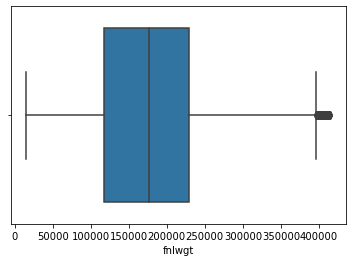

In [57]:
sns.boxplot(df['fnlwgt'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital.gain'>

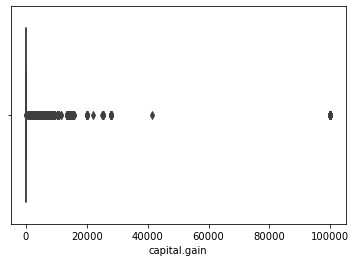

In [58]:
sns.boxplot(df['capital.gain'])

In [59]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [60]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

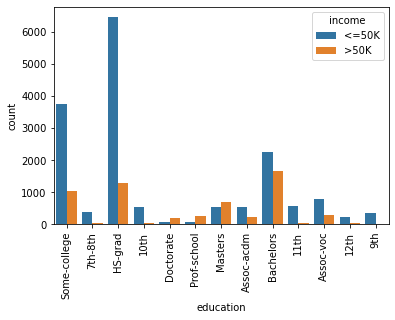

In [61]:
sns.countplot(x=df['education'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

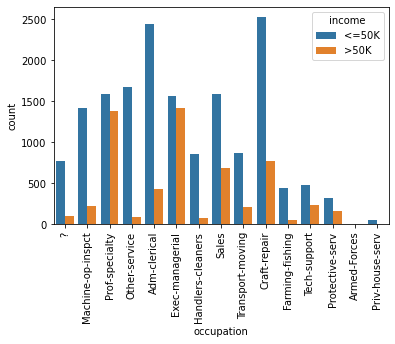

In [62]:
sns.countplot(x=df['occupation'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

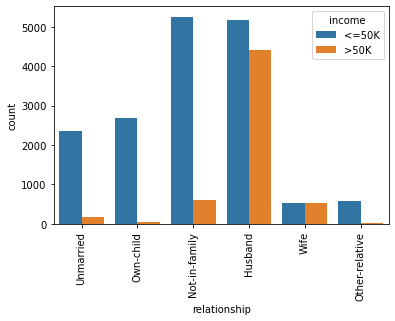

In [63]:
sns.countplot(x=df['relationship'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

In [64]:
df.groupby("relationship")['income'].value_counts()

relationship    income
Husband         <=50K     5167
                >50K      4406
Not-in-family   <=50K     5255
                >50K       614
Other-relative  <=50K      583
                >50K        29
Own-child       <=50K     2686
                >50K        53
Unmarried       <=50K     2346
                >50K       162
Wife            >50K       540
                <=50K      521
Name: income, dtype: int64

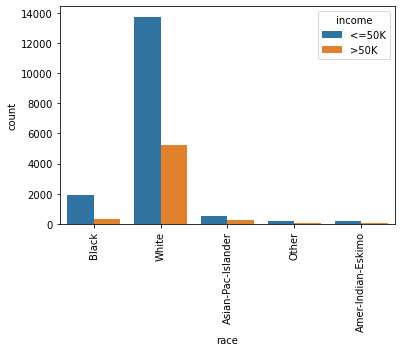

In [65]:
sns.countplot(x=df['race'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

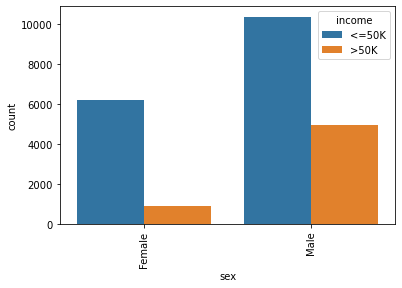

In [66]:
sns.countplot(x=df['sex'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

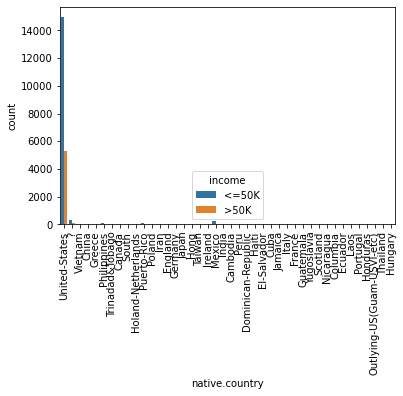

In [67]:
sns.countplot(x=df['native.country'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

In [68]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


<AxesSubplot:xlabel='sex', ylabel='hours.per.week'>

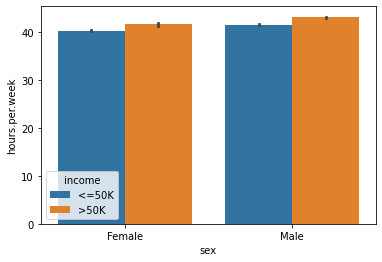

In [69]:
sns.barplot(x=df['sex'],y=df['hours.per.week'],hue=df["income"])

<AxesSubplot:xlabel='sex', ylabel='age'>

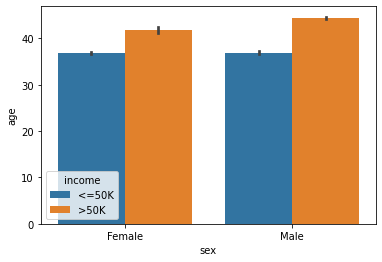

In [70]:
sns.barplot(x=df['sex'],y=df['age'],hue=df["income"])

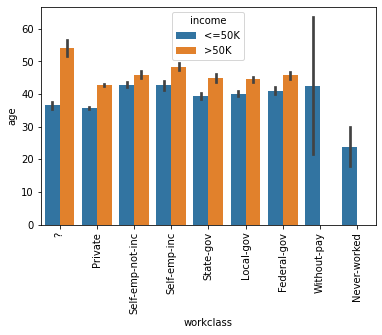

In [71]:
sns.barplot(x=df['workclass'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

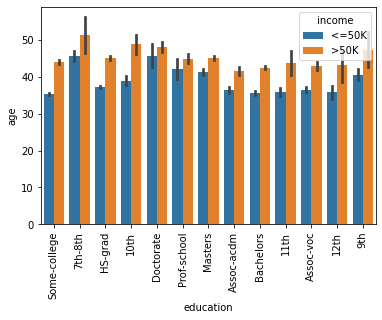

In [72]:
sns.barplot(x=df['education'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

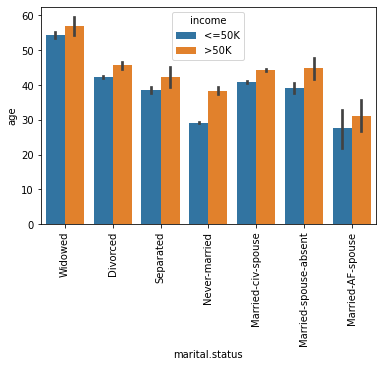

In [73]:
sns.barplot(x=df['marital.status'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

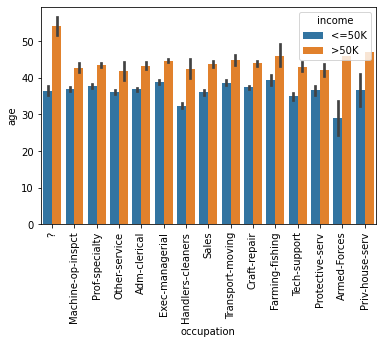

In [74]:
sns.barplot(x=df['occupation'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

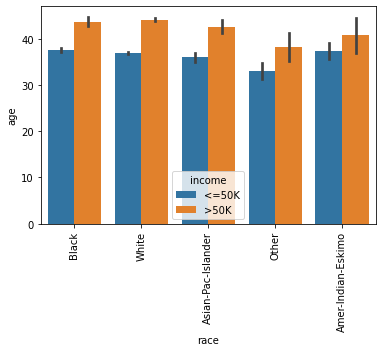

In [75]:
sns.barplot(x=df['race'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

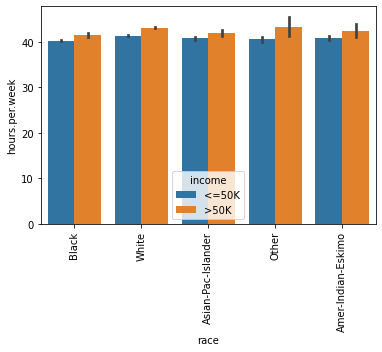

In [76]:
sns.barplot(x=df['race'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

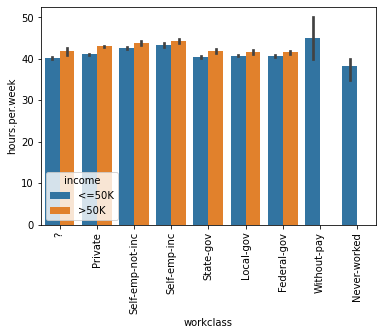

In [77]:
sns.barplot(x=df['workclass'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

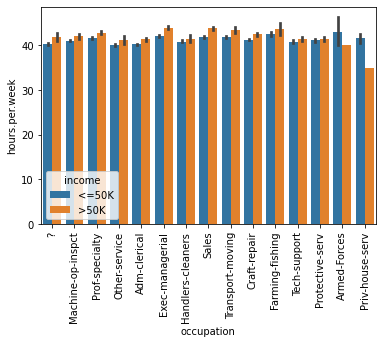

In [78]:
sns.barplot(x=df['occupation'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

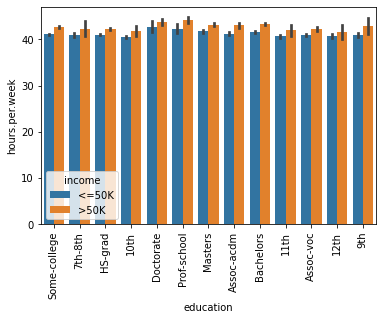

In [79]:
sns.barplot(x=df['education'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

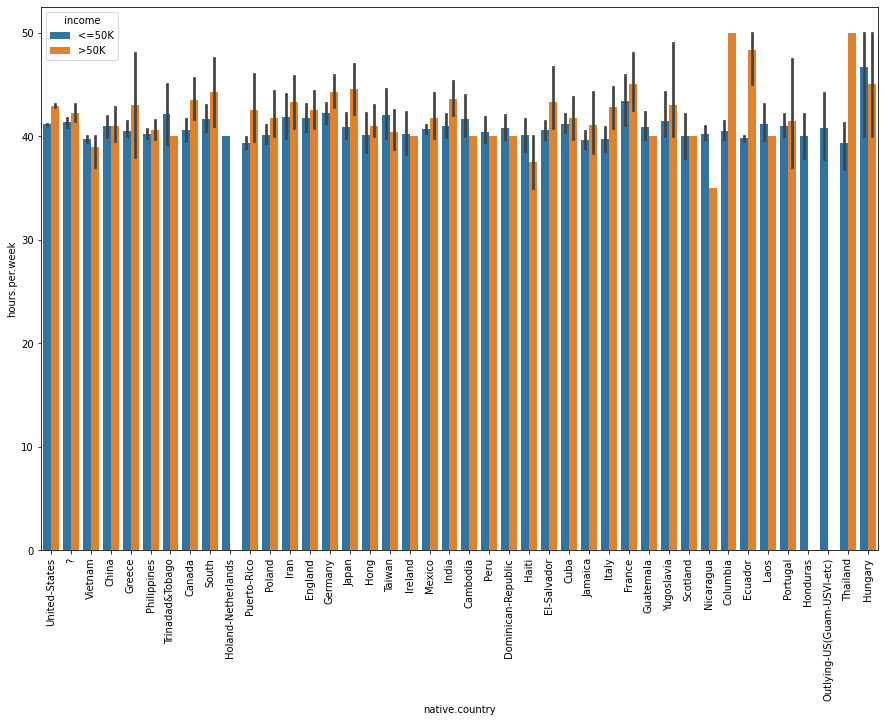

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['native.country'],y=df['hours.per.week'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

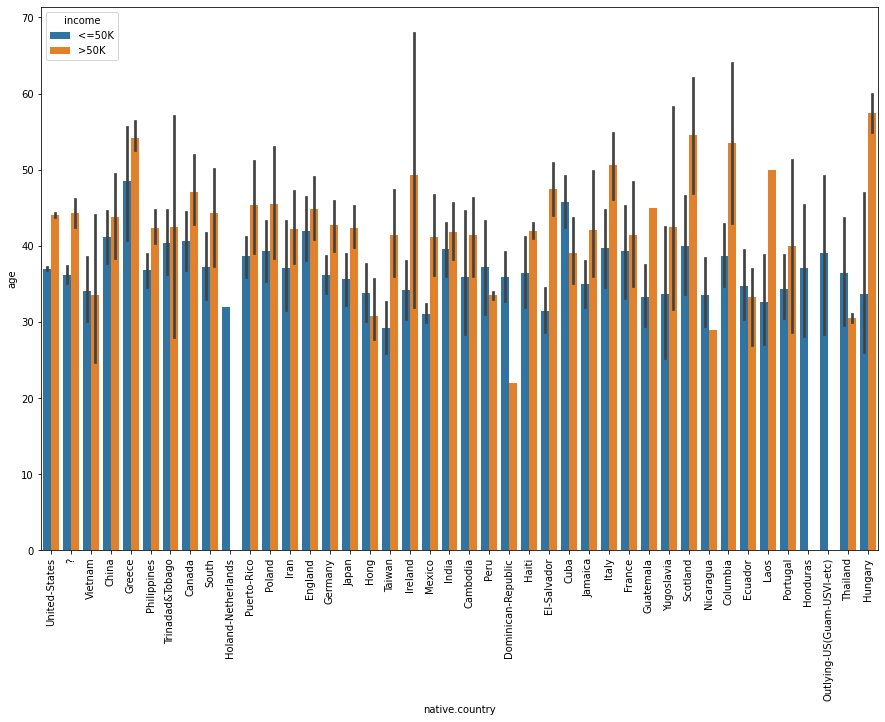

In [81]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['native.country'],y=df['age'],hue=df["income"])
plt.xticks(rotation=90)
plt.show()

# Compare the age and income of Male and Female race Black having Doctorate education  

In [82]:
new_df=df[['age','race','sex','income','education','relationship']]

In [83]:
black_doctor_df=new_df[(new_df['race']=="Black") & (new_df['education']=="Doctorate")]


In [84]:
black_doctor_df

,age,race,sex,income,education,relationship
10,45,Black,Female,>50K,Doctorate,Unmarried
1765,66,Black,Male,>50K,Doctorate,Husband
8281,40,Black,Female,<=50K,Doctorate,Not-in-family
26828,51,Black,Female,>50K,Doctorate,Wife
29931,50,Black,Male,>50K,Doctorate,Husband


<AxesSubplot:xlabel='sex', ylabel='age'>

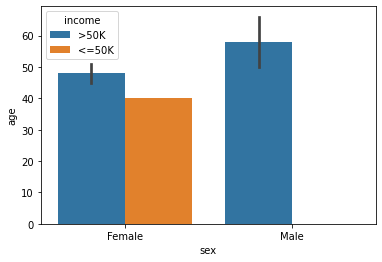

In [85]:
sns.barplot(x=black_doctor_df['sex'],y=black_doctor_df['age'],hue=black_doctor_df['income'])

<AxesSubplot:xlabel='relationship', ylabel='age'>

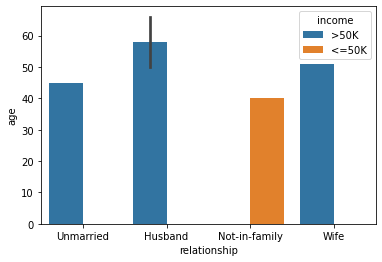

In [86]:
sns.barplot(x=black_doctor_df['relationship'],y=black_doctor_df['age'],hue=black_doctor_df['income'])

# Compare the income and age of  Male and Female for native country United-States

In [87]:
new_df=df[['sex','income','native.country','relationship','age']]

In [88]:
new_df

,sex,income,native.country,relationship,age
2,Female,<=50K,United-States,Unmarried,66
3,Female,<=50K,United-States,Unmarried,54
4,Female,<=50K,United-States,Own-child,41
5,Female,<=50K,United-States,Unmarried,34
6,Male,<=50K,United-States,Unmarried,38
...,...,...,...,...,...
32555,Male,>50K,United-States,Husband,53
32556,Male,<=50K,United-States,Not-in-family,22
32557,Female,<=50K,United-States,Wife,27
32558,Male,>50K,United-States,Husband,40


In [89]:
native_country_df=new_df[new_df['native.country']=="United-States"]


In [90]:
native_country_df

,sex,income,native.country,relationship,age
2,Female,<=50K,United-States,Unmarried,66
3,Female,<=50K,United-States,Unmarried,54
4,Female,<=50K,United-States,Own-child,41
5,Female,<=50K,United-States,Unmarried,34
6,Male,<=50K,United-States,Unmarried,38
...,...,...,...,...,...
32555,Male,>50K,United-States,Husband,53
32556,Male,<=50K,United-States,Not-in-family,22
32557,Female,<=50K,United-States,Wife,27
32558,Male,>50K,United-States,Husband,40


<AxesSubplot:xlabel='sex', ylabel='age'>

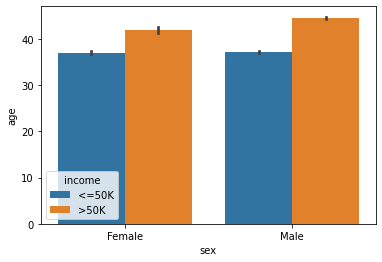

In [91]:
sns.barplot(x=native_country_df['sex'],y=native_country_df['age'],hue=native_country_df['income'])

<AxesSubplot:xlabel='relationship', ylabel='age'>

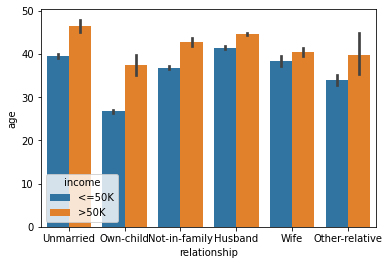

In [92]:
sns.barplot(x=native_country_df['relationship'],y=native_country_df['age'],hue=native_country_df['income'])

In [93]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


# Compare the age,sex and income of person with occupation as Tech-support

In [94]:
new_df=df[['age','occupation','sex','income','relationship']]

In [95]:
new_df

,age,occupation,sex,income,relationship
2,66,?,Female,<=50K,Unmarried
3,54,Machine-op-inspct,Female,<=50K,Unmarried
4,41,Prof-specialty,Female,<=50K,Own-child
5,34,Other-service,Female,<=50K,Unmarried
6,38,Adm-clerical,Male,<=50K,Unmarried
...,...,...,...,...,...
32555,53,Exec-managerial,Male,>50K,Husband
32556,22,Protective-serv,Male,<=50K,Not-in-family
32557,27,Tech-support,Female,<=50K,Wife
32558,40,Machine-op-inspct,Male,>50K,Husband


In [96]:
new_df=new_df[new_df['occupation']=="Tech-support"]



<AxesSubplot:xlabel='sex', ylabel='age'>

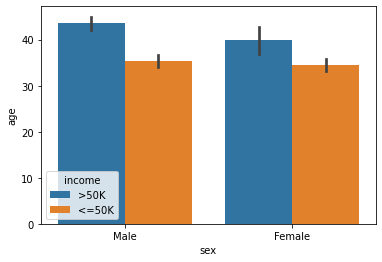

In [97]:
sns.barplot(x=new_df['sex'],y=new_df['age'],hue=new_df['income'])

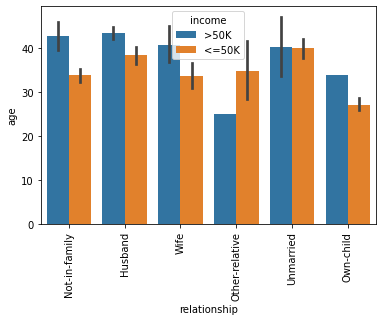

In [98]:
sns.barplot(x=new_df['relationship'],y=new_df['age'],hue=new_df['income'])
plt.xticks(rotation=90)
plt.show()

# Compare the private workclass,education,age,sex and income of person 

In [99]:
new_df=df[['age','workclass','sex','income','education']]

In [100]:
new_df=new_df[new_df['workclass']=="Private"]


In [101]:
new_df

,age,workclass,sex,income,education
3,54,Private,Female,<=50K,7th-8th
4,41,Private,Female,<=50K,Some-college
5,34,Private,Female,<=50K,HS-grad
6,38,Private,Male,<=50K,10th
10,45,Private,Female,>50K,Doctorate
...,...,...,...,...,...
32555,53,Private,Male,>50K,Masters
32556,22,Private,Male,<=50K,Some-college
32557,27,Private,Female,<=50K,Assoc-acdm
32558,40,Private,Male,>50K,HS-grad


<AxesSubplot:xlabel='sex', ylabel='age'>

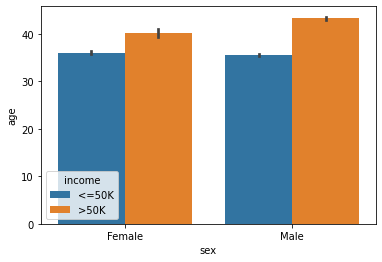

In [102]:
sns.barplot(x=new_df['sex'],y=new_df['age'],hue=new_df['income'])

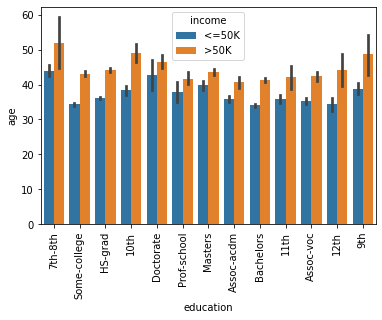

In [103]:
sns.barplot(x=new_df['education'],y=new_df['age'],hue=new_df['income'])
plt.xticks(rotation=90)
plt.show()

# Compare the marital.status Divorced,age,sex,race and income of person 

In [104]:
new_df=df[['age','marital.status','sex','income','race']]

In [105]:
new_df

,age,marital.status,sex,income,race
2,66,Widowed,Female,<=50K,Black
3,54,Divorced,Female,<=50K,White
4,41,Separated,Female,<=50K,White
5,34,Divorced,Female,<=50K,White
6,38,Separated,Male,<=50K,White
...,...,...,...,...,...
32555,53,Married-civ-spouse,Male,>50K,White
32556,22,Never-married,Male,<=50K,White
32557,27,Married-civ-spouse,Female,<=50K,White
32558,40,Married-civ-spouse,Male,>50K,White


In [106]:
new_df=new_df[new_df['marital.status']=="Divorced"]


<AxesSubplot:xlabel='sex', ylabel='age'>

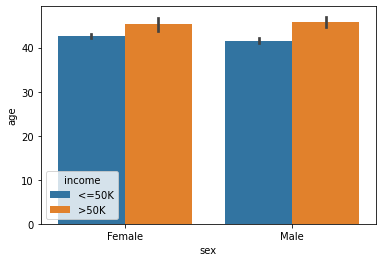

In [107]:
sns.barplot(x=new_df['sex'],y=new_df['age'],hue=new_df['income'])

<AxesSubplot:xlabel='race', ylabel='age'>

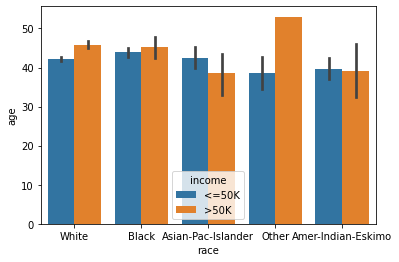

In [108]:
sns.barplot(x=new_df['race'],y=new_df['age'],hue=new_df['income'])

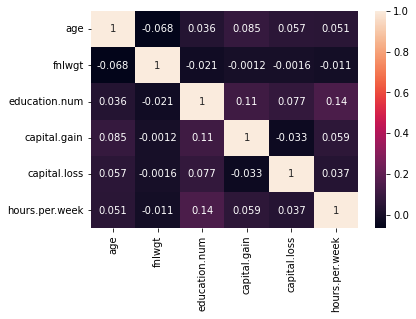

In [109]:
sns.heatmap(df.corr(),annot=True)
plt.show()

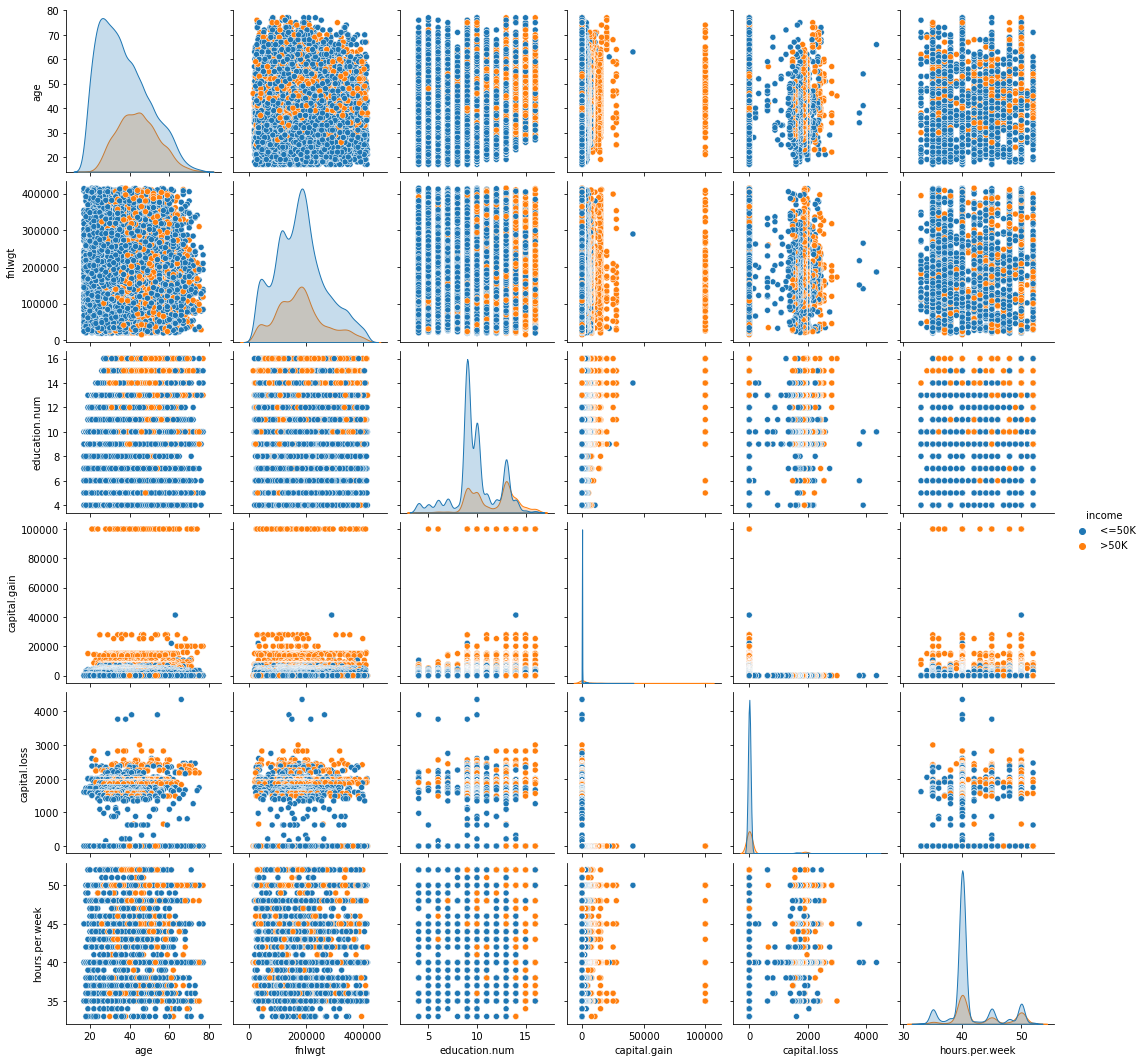

In [110]:
sns.pairplot(data=df,hue='income')

In [111]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [112]:
le=LabelEncoder()


In [113]:
df['education']=le.fit_transform(df['education'])



C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\2927521148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education']=le.fit_transform(df['education'])


In [114]:
df['workclass']=le.fit_transform(df['workclass'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\3240307165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass']=le.fit_transform(df['workclass'])


In [115]:
df['marital.status']=le.fit_transform(df['marital.status'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\3456549522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital.status']=le.fit_transform(df['marital.status'])


In [116]:
df['occupation']=le.fit_transform(df['occupation'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\1622587964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation']=le.fit_transform(df['occupation'])


In [117]:
df['relationship']=le.fit_transform(df['relationship'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\2756492325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relationship']=le.fit_transform(df['relationship'])


In [118]:
df['race']=le.fit_transform(df['race'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\2002995246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race']=le.fit_transform(df['race'])


In [119]:
df['sex']=le.fit_transform(df['sex'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\1340687048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=le.fit_transform(df['sex'])


In [120]:
df['native.country']=le.fit_transform(df['native.country'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7876\2332075896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native.country']=le.fit_transform(df['native.country'])


In [121]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,0,186061,12,10,6,0,4,2,0,0,4356,40,39,<=50K
3,54,4,140359,3,4,0,7,4,4,0,0,3900,40,39,<=50K
4,41,4,264663,12,10,5,10,3,4,0,0,3900,40,39,<=50K
5,34,4,216864,9,9,0,8,4,4,0,0,3770,45,39,<=50K
6,38,4,150601,0,6,5,1,4,4,1,0,3770,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,4,321865,10,14,2,4,0,4,1,0,0,40,39,>50K
32556,22,4,310152,12,10,4,11,1,4,1,0,0,40,39,<=50K
32557,27,4,257302,5,12,2,13,5,4,0,0,0,38,39,<=50K
32558,40,4,154374,9,9,2,7,0,4,1,0,0,40,39,>50K


In [122]:
new_df=pd.get_dummies(data=df['income'],drop_first=True)

In [123]:
new_df.columns=["income"]

In [124]:
df=df.drop('income',axis=1)


In [125]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
2,66,0,186061,12,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,3,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,12,10,5,10,3,4,0,0,3900,40,39
5,34,4,216864,9,9,0,8,4,4,0,0,3770,45,39
6,38,4,150601,0,6,5,1,4,4,1,0,3770,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,4,321865,10,14,2,4,0,4,1,0,0,40,39
32556,22,4,310152,12,10,4,11,1,4,1,0,0,40,39
32557,27,4,257302,5,12,2,13,5,4,0,0,0,38,39
32558,40,4,154374,9,9,2,7,0,4,1,0,0,40,39


In [126]:
df=pd.concat([df,new_df],axis=1)

In [127]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,0,186061,12,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,3,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,12,10,5,10,3,4,0,0,3900,40,39,0
5,34,4,216864,9,9,0,8,4,4,0,0,3770,45,39,0
6,38,4,150601,0,6,5,1,4,4,1,0,3770,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,4,321865,10,14,2,4,0,4,1,0,0,40,39,1
32556,22,4,310152,12,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,5,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,9,9,2,7,0,4,1,0,0,40,39,1


In [128]:
sc=StandardScaler()


In [129]:
y=df['income']

In [130]:
X=df.drop('income',axis=1)

In [131]:
sc=StandardScaler()


In [132]:
X=sc.fit_transform(X)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [134]:
X_train.shape

(17889, 14)

In [135]:
y.shape

(22362,)

In [136]:
lr=LogisticRegression()


In [137]:
lr.fit(X_train,y_train)

LogisticRegression()

In [138]:
y_pred=lr.predict(X_test)


In [139]:
accuracy_score(y_test,y_pred)

0.8117594455622624

In [140]:
confusion_matrix(y_test,y_pred)

array([[3136,  197],
       [ 645,  495]], dtype=int64)

In [141]:
y_pred=lr.predict(X_train)


In [142]:
accuracy_score(y_train,y_pred)

0.8158085974621275

In [143]:
rfc=RandomForestClassifier()


In [144]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_pred=rfc.predict(X_test)


In [146]:
accuracy_score(y_test,y_pred)

0.8499888218198077

In [147]:
confusion_matrix(y_test,y_pred)

array([[3094,  239],
       [ 432,  708]], dtype=int64)

In [148]:
y_pred=rfc.predict(X_train)


In [149]:
accuracy_score(y_train,y_pred)

0.9997763989043547

In [150]:
dtc=DecisionTreeClassifier()


In [151]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [152]:
y_pred=dtc.predict(X_test)


In [153]:
accuracy_score(y_test,y_pred)

0.7983456293315448

In [154]:
confusion_matrix(y_test,y_pred)

array([[2875,  458],
       [ 444,  696]], dtype=int64)

In [155]:
y_pred=dtc.predict(X_train)


In [156]:
accuracy_score(y_train,y_pred)

0.9999440997260887

In [157]:
xgb_i=xgb.XGBClassifier()

In [158]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [159]:
y_pred=xgb_i.predict(X_test)

In [160]:
accuracy_score(y_test,y_pred)

0.8591549295774648

In [161]:
confusion_matrix(y_test,y_pred)

array([[3108,  225],
       [ 405,  735]], dtype=int64)

In [162]:
y_pred=xgb_i.predict(X_train)

In [163]:
accuracy_score(y_train,y_pred)

0.9106154620157639

Logistic Regression with PCA

Scikit-Learn's PCA class implements PCA algorithm using the code below. Before diving deep, I will explain another important concept called explained variance ratio.

Explained Variance Ratio
A very useful piece of information is the explained variance ratio of each principal component. It is available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

Now, let's get to the PCA implementation

In [164]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14201617, 0.09529842, 0.08741839, 0.08156874, 0.07797971,
       0.07470238, 0.06963297, 0.06733964, 0.06285738, 0.05970912,
       0.05786331, 0.05054428, 0.04581733, 0.02725217])

In [165]:
pca.explained_variance_ratio_.cumsum()

array([0.14201617, 0.23731459, 0.32473298, 0.40630172, 0.48428143,
       0.5589838 , 0.62861677, 0.69595641, 0.75881379, 0.81852292,
       0.87638622, 0.9269305 , 0.97274783, 1.        ])

Select right number of dimensions

A better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [166]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


# Logistic Regression with first 13 features


In [167]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [169]:
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(sc.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.8118


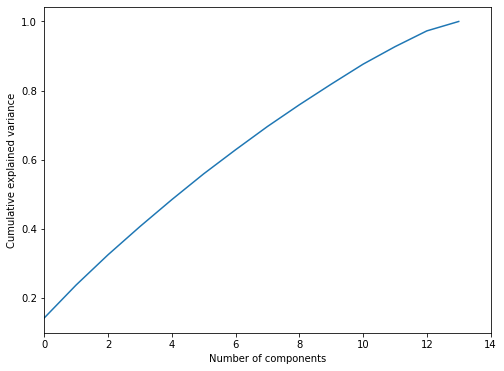

In [170]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The above plot shows that almost 90% of variance is explained by the first 12 components.